In [2]:
# Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft, rfftfreq, rfft
from scipy.optimize import *
import pandas as pd
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit

In [2]:
# Definitions
class sample:
    def __init__(self, wav_str):
        self.rate, data = wavfile.read(wav_str)
        self.y = np.asarray(data)[:,0]
        self.duration = self.y.size / self.rate    # full length of clip
        # normalization
        self.x = np.linspace(0, self.duration, self.y.size)
        self.y = np.multiply(1.0/max(self.y), self.y)
    def bounds(self, a, b):
        self.x = self.x[int(self.rate * a): int(self.rate * b)]
        self.y = self.y[int(self.rate * a): int(self.rate * b)]
        self.fourier()
    def save(self, t, osc, filename):
        self.bounds(t, t + 0.25)
        peaks, _ = find_peaks(self.y, prominence=0.5)
        self.x = self.x[peaks[0]:peaks[osc - 1]]
        self.x -= self.x[0]
        self.y = self.y[peaks[0]:peaks[osc - 1]]
        self.fourier()
        peaks, prop = find_peaks(self.fy, prominence=0.01)
        plt.plot(self.fx, self.fy, self.fx[peaks], self.fy[peaks])
        plt.axis([0, 5000, 0, 1])
#         np.savez(filename, x=self.x, y=self.y, fx=self.fx, fy=self.fy)
    def fourier(self):
        self.fx = fftfreq(self.y.size, 1.0 / self.rate)
        self.fy = np.abs(fft(self.y))
        mask = self.fx > 0 # restricts to positive domain
        self.fx, self.fy = self.fx[mask], self.fy[mask] / max(self.fy) # normalizes fft

oooooooooooooooooooooooooooooo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

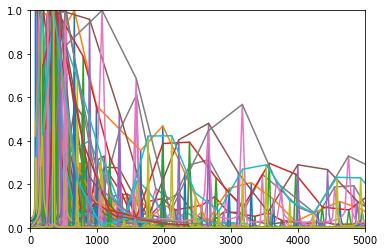

In [30]:
# string = "data/recording_2/AC_LOW_G.wav"
# obj = sample(string)
# obj.save(0.25, 20, None)

s = np.load()

# # Saving Data
# times = pd.read_csv('time_data.csv')
# print(30 * 'o')
# for arr in np.array(times):                                                # arr: [name, time, osc]
#     data = sample('data/recording_2/' + str(arr[0]) + '.wav')       # Creates / Reads from file string
#     data.save(arr[1], arr[2], "data/analyzedNew/" + arr[0])
#     print('x', end='')

oooooooooooooooooooooooooooooo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

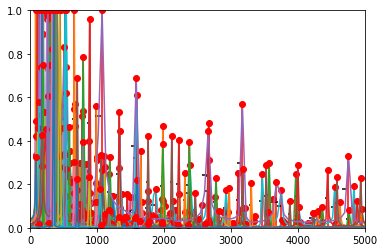

In [21]:
def openFile(string):
    filestr = lambda s: 'data/analyzedNew/' + s + '.npz'
    obj = np.load(filestr(string))
    return getData(obj)
    
    
#     x, y, fx, fy = obj['x'], obj['y'], obj['fx'], obj['fy']
    
    
def timePlot(obj):
    plt.plot(obj['x'], obj['y'])
def getData(obj):
    t = obj['fx'][0] # Sampling rate
    peaks, props = find_peaks(obj['fy'], prominence=0.01)
    widths = peak_widths(obj['fy'], peaks, rel_height=0.5)
    
    plt.plot(obj['fx'], obj['fy'], obj['fx'][peaks], obj['fy'][peaks], 'ro')
    plt.axis([0, 5000, 0, 1])
    plt.vlines(x=obj['fx'][peaks], ymin=np.zeros(len(peaks)), ymax=obj['fy'][peaks], colors='r')
#     print(len(widths))
    plt.hlines(y=widths[1], xmin=t*widths[2], xmax=t*widths[3])
#     print(obj['fx'])
    return np.array([np.asarray(obj['fy'][peaks]), np.asarray(t*widths[0])])
    
filestr = lambda s: 'data/analyzedNew/' + s + '.npz'
e = np.load(filestr('AC_HIGH_C'))
# freqPlot(e)
openFile('EL_HIGH_C')
# Saving Data
times = pd.read_csv('time_data.csv')
# times = times.append(pd.DataFrame([['AC', 2, 3]],columns=list(times.columns)), ignore_index=True)
print(30 * 'o')
for arr in np.array(times):                                                # arr: [name, time, osc]
    data = openFile(str(arr[0]))       # Creates / Reads from file string
    np.save("data/extractedData/" + arr[0], data)
    print('x', end='')

[  4.81932499   5.39675948   6.44592462   9.93839223 100.
  11.71035714   5.41868243   3.93058628   2.28749753]


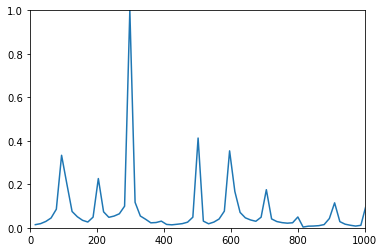

In [57]:
filestr = lambda s: 'data/analyzedNew/' + s + '.npz'
e = np.load(filestr('AC_LOW_G'))
t = e['fx'][0]
x = e['fx']# [0:int(1000 / e['fx'][0])]
y = e['fy']# [0:int(1000 / e['fx'][0])]
plt.plot(x, y)
plt.axis([0, 1000, 0, 1])
print(100 * y[int(200/t)+2: int(300/t)+4])

data/recording_2/AC_HIGH_F.wav
[13307, 15690]
['data/recording_2/EL_LOW_E.wav', 'data/recording_2/EL_LOW_G.wav', 'data/recording_2/EL_LOW_A.wav', 'data/recording_2/EL_LOW_C.wav', 'data/recording_2/EL_LOW_F.wav', 'data/recording_2/EL_MID_E.wav', 'data/recording_2/EL_MID_G.wav', 'data/recording_2/EL_MID_A.wav', 'data/recording_2/EL_MID_C.wav', 'data/recording_2/EL_MID_F.wav', 'data/recording_2/EL_HIGH_E.wav', 'data/recording_2/EL_HIGH_G.wav', 'data/recording_2/EL_HIGH_A.wav', 'data/recording_2/EL_HIGH_C.wav', 'data/recording_2/EL_HIGH_F.wav', 'data/recording_2/AC_LOW_E.wav', 'data/recording_2/AC_LOW_G.wav', 'data/recording_2/AC_LOW_A.wav', 'data/recording_2/AC_LOW_C.wav', 'data/recording_2/AC_LOW_F.wav', 'data/recording_2/AC_MID_E.wav', 'data/recording_2/AC_MID_G.wav', 'data/recording_2/AC_MID_A.wav', 'data/recording_2/AC_MID_C.wav', 'data/recording_2/AC_MID_F.wav', 'data/recording_2/AC_HIGH_E.wav', 'data/recording_2/AC_HIGH_G.wav', 'data/recording_2/AC_HIGH_A.wav', 'data/recording_2/AC_

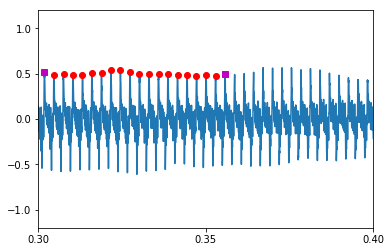

In [2]:
# Inspecting Sound Wave

# Options
i = 4
elow = [0.35, 0.3, 0.2, 0.4, 0.3]
emid = [0.45, 0.5, 0.35, 0.35, 0.5]
ehigh = [0.3, 0.3, 0.35, 0.4, 0.35]
alow = [0.4, 0.3, 0.55, 0.3, 0.4]
amid = [0.45, 0.35, 0.35, 0.3, 0.4]
ahigh = [0.4, 0.3, 0.3, 0.5, 0.3]
sets = ['EL_LOW_', 'EL_MID_', 'EL_HIGH_', 'AC_LOW_', 'AC_MID_', 'AC_HIGH_']
files = 'E G A C F'.split()
fnames = [str('data/recording_2/' + s + f + '.wav') for s in sets for f in files]
fname = 'data/recording_2/' + sets[5] + files[i] + '.wav'

# Open File
rate, data = wavfile.read(fname)
idx = lambda n: int(n * rate)
time = data[:, 0].size / rate
x = np.arange(0, time, 1/rate)
y = data[:, 0] / max(data[:, 0])
a, b = ahigh[i], ahigh[i] + 0.1

# Isolate Sample
peaks, _ = find_peaks(y, distance = 100)
peaks = peaks[peaks > idx(a)][:20]

# Bounds Data

bounds = [[[15622, 26712], [13339, 22578], [8838, 17283], [17892, 24873], [13481, 23999]], # elow
          [[19949, 24992], [22088, 26366], [15619, 19392], [15601, 18767], [22124, 26883]], # emid
          [[13244, 15790], [13295, 15424], [15503, 17400], [17648, 19251], [15528, 17915]], # ehigh
          [[17923, 28117], [13384, 21663], [24316, 31878], [13360, 19638], [17702, 27211]], # alow
          [[20088, 25128], [15551, 19830], [15502, 19282], [13296, 16459], [17844, 22577]], # amid
          [[17761, 20300], [13313, 15430], [13242, 15129], [22119, 23701], [13307, 15690]], # ahigh
         ]

# Graphing
plt.plot(x, y, x[peaks], y[peaks], 'ro', x[[peaks[0], peaks[-1]]], y[[peaks[0], peaks[-1]]], 'ms')
plt.xticks(np.arange(a, b, 0.05))
plt.axis([a, b, -1.2, 1.2])
print(fname)
print("[" + str(peaks[0]) + ", " + str(peaks[-1] + 1) + "]")
print(fnames)

data/recording_2/AC_HIGH_F.wav


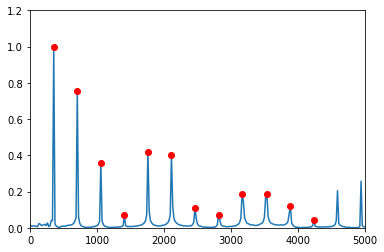

In [271]:
# Export data
# result = []

# Choose frame
# i = 0
def export(i):
    start = bounds[i//5][i%5][0]
    end = bounds[i//5][i%5][1]
    fname = fnames[i]
    rate, data = wavfile.read(fname)
    y = data[start:end, 0] / max(data[:, 0])

    # Calculate Fourier data
    fx = fftfreq(y.size, 1.0 / rate)
    fy = np.abs(fft(y))
    fy = fy[fx >= 0]
    fx = fx[fx >= 0]
    fy /= max(fy)
#     peaks, _ = find_peaks(fy, distance=15)
#     peaks = peaks[1:]
#     peaks = peaks[:12]
#     widths = peak_widths(fy, peaks, rel_height=0.5)
#     widths = widths[0][:12] * fx[1]
    np.savez('data/analyzedWeek20/' + fnames[i].split('/')[2][:-4] + '.npz', fx, fy)

for i in range(30):
    export(i)
    
# Plotting
plt.hlines(widths[1], fx[1] * widths[2], fx[1] * widths[3])
plt.plot(fx, fy, fx[peaks], fy[peaks], 'ro')
plt.axis([0, 5000, 0, 1.2])
print(fname)
sample = np.array([fx[peaks], fy[peaks], widths])
# print(sample)

In [261]:
# result.append(sample)
# i+=1
# np.array(result).shape
# result

# Redo
# result = result[:-1]
# i-=1
# result
# sample
# np.save('data/analyzedWeek20/dataTable.npy', table)

In [266]:
# print(table, np.load('data/analyzedWeek20/dataTable.npy').shape)

[[[8.35076646e+01 1.63038774e+02 2.46546438e+02 ... 8.31100090e+02
   9.18584310e+02 1.00606853e+03]
  [4.50377833e-01 7.74429632e-01 1.00000000e+00 ... 5.52865540e-02
   2.43027298e-02 1.60873246e-03]
  [5.03129090e+00 8.36668314e+00 5.39890388e+00 ... 7.88429278e+00
   4.97666294e+00 4.40044346e+00]]

 [[1.00238121e+02 2.00476242e+02 3.00714363e+02 ... 1.01670094e+03
   1.12648555e+03 1.22672367e+03]
  [5.52677335e-01 1.00000000e+00 6.82341883e-01 ... 1.02499816e-02
   2.17304436e-03 2.06633573e-03]
  [4.87688703e+00 6.04187101e+00 6.55946642e+00 ... 6.63036399e+00
   2.57587011e+01 6.66937502e+00]]

 [[1.09662522e+02 2.19325044e+02 3.28987567e+02 ... 1.10706927e+03
   1.21673179e+03 1.33161634e+03]
  [5.89482810e-01 8.51881227e-01 1.00000000e+00 ... 5.52670689e-02
   2.19420911e-02 1.56983860e-03]
  [5.41882515e+00 5.95127751e+00 6.89314473e+00 ... 6.46222756e+00
   9.86323065e+00 9.96698631e+00]]

 ...

 [[4.44038156e+02 8.88076312e+02 1.33211447e+03 ... 4.44038156e+03
   4.8844197

In [223]:
# Fourier Analysis
x = x[peaks[0]]
# FT and Height Plot
fx = rfftfreq(y.size, 1.0 / rate)
fy = np.abs(rfft(y))
f = fx[1] - fx[0]
fy = fy / max(fy) # normalizes rfft
fpeaks, prop = find_peaks(fy, distance=550, prominence=0.005)
# arrofi = [1, 3, 5, 7, 8, 9, 10, 11, 12, 13]
# fpeaks = fpeaks[arrofi]
# print(fx[fpeaks])
# fwidths = peak_widths(fy, fpeaks, rel_height=0.5)
plt.plot(fx, fy, fx[fpeaks], fy[fpeaks], 'ro')
plt.axis([0, 1500, 0, 1.2])
# fwidths[0] * f / 2 # This is the formula to get the widths

IndexError: index 19 is out of bounds for axis 0 with size 2

In [128]:
print('FREQUENCIES: ', fx[fpeaks])
print('HEIGHTS: ', fy[fpeaks])
print('WIDTHS: ', f * fwidths[0])
print(len(fx[fpeaks]), len(fy[fpeaks]), len(f * fwidths[0]))
fname = 'data/analyzedWeek20/' + fname[17:-4] + '.npz'
np.savez(fname, frequencies=fx[fpeaks], heights=fy[fpeaks], widths=f * fwidths[0])
print('DONE!')

FREQUENCIES:  [ 132.33327985  264.79758276  397.78597786  530.64334991  663.89379111
  797.53730146  931.44285791 1066.0035296  1201.08829349]
HEIGHTS:  [0.84513657 1.         0.31748989 0.10676588 0.07293934 0.02786756
 0.01047092 0.01262511 0.00778458]
WIDTHS:  [0.14398884 0.19119463 0.32605768 0.14461807 0.58709971 0.13825279
 0.26458106 0.18316437 0.58770628 0.19233729]
9 9 10
DONE!


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


array([0.57733029, 0.57734349, 0.57734315, 0.5773444 , 0.57733571,
       0.57735751, 0.577329  , 0.57730315, 0.57734533, 0.57729202,
       0.5772999 , 0.5773294 , 0.57736577, 0.57734977, 0.57707292,
       0.5773563 , 0.57747049, 0.57688707, 0.57741351, 0.5774497 ,
       0.57710814, 0.57738272, 0.5767236 , 0.57810336, 0.57671466,
       0.576387  , 0.57712023, 0.57727396, 0.57709905, 0.57690773,
       0.57706989, 0.57800846, 0.57759288, 0.57712354, 0.57572916,
       0.57790195, 0.57752216, 0.57702195, 0.57613285, 0.57744125,
       0.57579271, 0.57871217, 0.57540372, 0.57830264, 0.57841742,
       0.57201962, 0.58092407, 0.57338731, 0.57681795, 0.58118351,
       0.57112309, 0.57667557, 0.58368449, 0.57171092, 0.57159632,
       0.58457445, 0.58113347, 0.56568295, 0.5734314 , 0.58567513,
       0.58346784, 0.56553256, 0.56876975, 0.57984272, 0.59162972,
       0.58075291, 0.55908294, 0.56769503, 0.5778626 , 0.58863886,
       0.59168035, 0.56805476, 0.55889782, 0.56773577, 0.57707

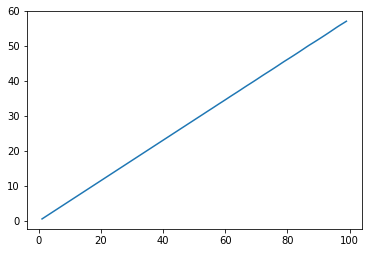

In [9]:
# Creates table of widths
def getWidth(v):
    q = v
    f = lambda x: 1 / np.sqrt((1+(q**2)*(x-1/x)**2))
    x = np.arange(0, 100, 0.001)
    y = f(x)
#     plt.plot(x, y)
#     plt.axis([0, 5, 0, 1.5])
    peaks, prop = find_peaks(y)
    widths = peak_widths(y, peaks)
#     plt.plot(x[peaks], y[peaks], 'ro')
#     plt.hlines(widths[1], x[1] * widths[2], x[1] * widths[3])
    return widths[0][0] * (x[1])
x = np.arange(1, 100)
y = [(getWidth(i)) ** -1 for i in x]
plt.plot(x, y)
# slope = lambda n: (y[n]-y[n-1]) / (x[n] - x[n - 1])
# s = slope(1)
np.diff(y)

[3.37386909]


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


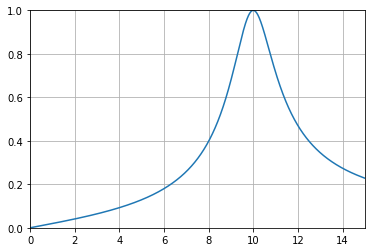

In [6]:
def createPeak(frequency, amp, width):
    f = 0.01 # Freq step
    x = np.arange(0, 1000, f)
#     q = (58.39403273 ** 0.5) * np.exp ( -0.41863453 * (width - 1.93634754) )
    q = (22.7039974 * (width - 0.0201857068) ** -2 + 2.56935276) ** 0.5
#     y = lambda t: amp * (1+(3/width**2) * (t / frequency - frequency / t) **2) ** -0.5
    y = lambda t: amp * (1 + (q ** 2) * (t / frequency - frequency / t) ** 2) ** -0.5
    signal = y(x)
    peaks, _ = find_peaks(signal)
    widths = peak_widths(signal, peaks)
    print(f * widths[0])
    plt.plot(x, signal)
    plt.axis([0, 15, 0, 1])

#     return y(x)
def exportData(name, heights, widths):
    np.savez("data/peakData/" + name + ".npz", a=heights, w=widths)
    
createPeak(10, 1, 1)
plt.grid()

In [4]:
'hello/world/hi.py'.split('/')[2]
x = np.array([[1,2,3], [2,3,4]])
x.shape

(2, 3)

In [12]:
y = lambda x: x * x
# print(y(2), list(map(y, [1,2,3])))
x = np.array([1,2,3]
list(map(y, x))

SyntaxError: invalid syntax (<ipython-input-12-9b764a5ede18>, line 4)